# Regression Final Project

www.zingat.com sitesine gidip bulunduğunuz şehre ait kira ilanlarını webscraping ile alarak, regression algoritmaları ile ev kira fiyatlarını tahmin eden bir model geliştireceksiniz.
Makine Öğrenmesinde öğrendiğimiz modellerin yanında Derin Öğrenme, Tensorflow ve Keras kullanarak yeniden tahminleme yapacaksınız.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen

## Webscrapping

In [3]:
def getURL(url):
    result = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"})
    soup = BeautifulSoup(result.text, 'html.parser')
    return soup

In [4]:
pages = []
def page_num():

    html = getURL("https://www.zingat.com/istanbul-kiralik-daire")
    for i in range(1,49):
        pages.append("https://www.zingat.com/istanbul-kiralik-daire?page=" + str(i))
    return pages
page_num()

['https://www.zingat.com/istanbul-kiralik-daire?page=1',
 'https://www.zingat.com/istanbul-kiralik-daire?page=2',
 'https://www.zingat.com/istanbul-kiralik-daire?page=3',
 'https://www.zingat.com/istanbul-kiralik-daire?page=4',
 'https://www.zingat.com/istanbul-kiralik-daire?page=5',
 'https://www.zingat.com/istanbul-kiralik-daire?page=6',
 'https://www.zingat.com/istanbul-kiralik-daire?page=7',
 'https://www.zingat.com/istanbul-kiralik-daire?page=8',
 'https://www.zingat.com/istanbul-kiralik-daire?page=9',
 'https://www.zingat.com/istanbul-kiralik-daire?page=10',
 'https://www.zingat.com/istanbul-kiralik-daire?page=11',
 'https://www.zingat.com/istanbul-kiralik-daire?page=12',
 'https://www.zingat.com/istanbul-kiralik-daire?page=13',
 'https://www.zingat.com/istanbul-kiralik-daire?page=14',
 'https://www.zingat.com/istanbul-kiralik-daire?page=15',
 'https://www.zingat.com/istanbul-kiralik-daire?page=16',
 'https://www.zingat.com/istanbul-kiralik-daire?page=17',
 'https://www.zingat.co

In [5]:
ilanlar = []
def get_ilanlar():
    for i in pages[::]:
        html = getURL(i)
        for sonuc in html.findAll("a",{"class":"zl-card-inner"}):
            ilanlar.append("https://www.zingat.com" + sonuc.get("href"))
    return ilanlar
get_ilanlar()

['https://www.zingat.com/suadiye-full-mobilyali-4-1-balkonlu-kiralik-daire-5051468i',
 'https://www.zingat.com/silivri-gumusyakada-kiralik-daire-5060855i',
 'https://www.zingat.com/esenyurtta-meydana-yakin-dubleks-4969750i',
 'https://www.zingat.com/fatih-mh-5-cadde-ust-tarafi-4-yillik-1-1-y-giris-kiralik-daire-5066196i',
 'https://www.zingat.com/kayalardan-cok-keyifli-mustakil-girisli-ve-bahceli-4-1-dubleks-5063714i',
 'https://www.zingat.com/umraniye-cakmakta-kiralik-2-1-daire-5065047i',
 'https://www.zingat.com/b-pasa-kocatepede-forum-istanbul-ve-metroya-600-m-kiralik-daire-5062825i',
 'https://www.zingat.com/muslum-emlaktan-merkezde-kiralik-yabanciya-uygun-1-1-12000tl-5065144i',
 'https://www.zingat.com/mecidiyekoy-buyukdere-caddesi-otoparkli-2-1-esyali-kiralik-daire-5039311i',
 'https://www.zingat.com/nisantasi-husrev-gerede-caddesinde-esyali-3-5-1-daire-5062518i',
 'https://www.zingat.com/kagithane-mari-4401-residence-yukse-ara-kat-1-1-kiralik-daire-5061072i',
 'https://www.zinga

In [6]:
liste = []
for daire in ilanlar[::]:
    html = getURL(daire)
    fiyat=html.find('div',{'class':'col-md-3 price-info-text'}).find_all('strong')[1].text.strip() if html.find('div',{'class':'col-md-3 price-info-text'}) else None
    ilan_tarihi=html.find('div', {'class':'detail-info not-printable'}).find_all('div')[3].find('strong').text.strip() if html.find('div', {'class':'detail-info not-printable'}) else None
    ilce = html.find("div", {"class":"detail-location-path"}).h2.text.split(",")[1].strip() if html.find("div", {"class":"detail-location-path"}) else None
    net_m2=html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[2].find("span").text.replace("m²","").strip() if html.find("ul", {"class":"row attribute-detail-list"}) else None
    brüt_m2=html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.replace("m²","").strip() if html.find("ul", {"class":"row attribute-detail-list"}) else None
    oda=html.find('strong',{'data-zingalite':'property-room-count'}).text.strip() if html.find('strong',{'data-zingalite':'property-room-count'}) else None
    banyo=html.find('strong', string='Banyo Sayısı').find_next('span').text.strip() if html.find('strong', string='Banyo Sayısı') else None
    kac_katlı=html.find('strong', string='Binadaki Kat Sayısı').find_next('span').text.strip() if html.find('strong', string='Binadaki Kat Sayısı') else None 
    isitma_tipi=html.find('strong', string='Isıtma Tipi').find_next('span').text.strip() if html.find('strong', string='Isıtma Tipi') else None
    bina_sekli=html.find('strong', string='Konut Şekli').find_next('span').text.strip() if html.find('strong', string='Konut Şekli') else None
    bul_kat=html.find('strong', string='Bulunduğu Kat').find_next('span').text.strip() if html.find('strong', string='Bulunduğu Kat') else None
    yas=html.find('strong', string='Bina Yaşı').find_next('span').text.strip() if html.find('strong', string='Bina Yaşı') else None
    esyali=html.find('strong', string='Mobilya Durumu').find_next('span').text.strip() if html.find('strong', string='Mobilya Durumu') else None
    kul_durumu=html.find('strong', string='Kullanım Durumu').find_next('span').text.strip() if html.find('strong', string='Kullanım Durumu') else None
    Yapı_durumu=html.find('strong', string='Yapının Durumu').find_next('span').text.strip() if html.find('strong', string='Yapının Durumu') else None
    Depozito=html.find('strong', string='Depozito').find_next('span').text.strip() if html.find('strong', string='Depozito') else None
    aidat=html.find('strong', string='Aidat').find_next('span').text.strip() if html.find('strong', string='Aidat') else None
    kimden=html.find('strong', string='Kimden').find_next('span').text.strip() if html.find('strong', string='Kimden') else None
    
    liste.append([fiyat, ilan_tarihi, ilce, net_m2, brüt_m2, oda, banyo, kac_katlı, isitma_tipi, bina_sekli, bul_kat, yas, esyali, kul_durumu, Yapı_durumu, Depozito, aidat, kimden])
    
columns=['Fiyat','İlan Tarihi','İlce','Net(m²)','Brüt(m²)','Oda Sayısı','Banyo Sayısı','Kat Sayısı','İsıtma Tipi','Bina Türü','Bulunduğu Kat','Bina Yası','Esya Durumu','Kullanım Durumu','Yapının Durumu','Depozito','Aidat','Kimden']   

In [7]:
df=pd.DataFrame(liste,columns=columns)

In [8]:
df

,Fiyat,İlan Tarihi,İlce,Net(m²),Brüt(m²),Oda Sayısı,Banyo Sayısı,Kat Sayısı,İsıtma Tipi,Bina Türü,Bulunduğu Kat,Bina Yası,Esya Durumu,Kullanım Durumu,Yapının Durumu,Depozito,Aidat,Kimden
0,120.000 TL,3 Mayıs 2024,Kadıköy,168,215,4 + 1,2,10-20 arası,Kombi (Doğalgaz),None,2,6-10 arası,Sadece Beyaz Eşya,Boş,İkinci El,0 TL undefined,0 TL (aylık),None
1,11.000 TL,27 Nisan 2024,Silivri,65,70,1 + 1,1,3,Kombi (Doğalgaz),Bahçe Katı,Bahçe katı,6-10 arası,Eşyalı (Mobilyalı),Boş,İkinci El,20.000 TL,None,Danışman
2,20.000 TL,18 Nisan 2024,Esenyurt,145,180,4 + 1,2,None,None,None,None,None,None,None,None,None,None,None
3,12.000 TL,6 Mayıs 2024,Esenler,55,60,1 + 1,1,4,Kombi (Doğalgaz),Giriş Kat,Yüksek Giriş,4,None,Boş,Sıfır,12.000 TL,None,Danışman
4,36.000 TL,3 Mayıs 2024,Bakırköy,150,200,4 + 1,2,3,None,Bahçe Dubleksi,Giriş Katı,26-30 arası,Eşyasız,Boş,None,0 TL,400 TL (aylık),None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,65.990 TL,16 Nisan 2024,Kadıköy,110,132,3 + 1,2,10-20 arası,Kombi (Doğalgaz),None,2,6-10 arası,Eşyalı (Mobilyalı),Boş,İkinci El,0 TL,0 TL (aylık),None
1004,40.000 TL,15 Nisan 2024,Kadıköy,127,135,3 + 1,3,10-20 arası,Merkezi Sistem,Ara Kat,10,26-30 arası,Eşyasız,Boş,None,40.000 TL,0 TL (aylık),Danışman
1005,65.000 TL,15 Nisan 2024,Şişli,170,190,3 + 1,2,7,Merkezi Sistem (Isı Payı Ölçer),Ara Kat,2,21-25 arası,Eşyasız,Boş,İkinci El,65.000 TL,750 TL (aylık),Danışman
1006,26.000 TL,16 Nisan 2024,Şişli,70,75,1 + 1,1,3,Merkezi Sistem (Isı Payı Ölçer),Ara Kat,3,6-10 arası,Eşyalı (Mobilyalı),Boş,İkinci El,26.000 TL undefined,0 TL (aylık),Danışman


In [9]:
df.to_csv('Zingatt.csv', index=False)

In [10]:
import pandas as pd

In [406]:
df=pd.read_csv('Zingatt.csv')

In [407]:
df

,Fiyat,İlan Tarihi,İlce,Net(m²),Brüt(m²),Oda Sayısı,Banyo Sayısı,Kat Sayısı,İsıtma Tipi,Bina Türü,Bulunduğu Kat,Bina Yası,Esya Durumu,Kullanım Durumu,Yapının Durumu,Depozito,Aidat,Kimden
0,120.000 TL,3 Mayıs 2024,Kadıköy,168,215,4 + 1,2,10-20 arası,Kombi (Doğalgaz),NaN,2,6-10 arası,Sadece Beyaz Eşya,Boş,İkinci El,0 TL undefined,0 TL (aylık),NaN
1,11.000 TL,27 Nisan 2024,Silivri,65,70,1 + 1,1,3,Kombi (Doğalgaz),Bahçe Katı,Bahçe katı,6-10 arası,Eşyalı (Mobilyalı),Boş,İkinci El,20.000 TL,NaN,Danışman
2,20.000 TL,18 Nisan 2024,Esenyurt,145,180,4 + 1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.000 TL,6 Mayıs 2024,Esenler,55,60,1 + 1,1,4,Kombi (Doğalgaz),Giriş Kat,Yüksek Giriş,4,NaN,Boş,Sıfır,12.000 TL,NaN,Danışman
4,36.000 TL,3 Mayıs 2024,Bakırköy,150,200,4 + 1,2,3,NaN,Bahçe Dubleksi,Giriş Katı,26-30 arası,Eşyasız,Boş,NaN,0 TL,400 TL (aylık),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,65.990 TL,16 Nisan 2024,Kadıköy,110,132,3 + 1,2,10-20 arası,Kombi (Doğalgaz),NaN,2,6-10 arası,Eşyalı (Mobilyalı),Boş,İkinci El,0 TL,0 TL (aylık),NaN
1004,40.000 TL,15 Nisan 2024,Kadıköy,127,135,3 + 1,3,10-20 arası,Merkezi Sistem,Ara Kat,10,26-30 arası,Eşyasız,Boş,NaN,40.000 TL,0 TL (aylık),Danışman
1005,65.000 TL,15 Nisan 2024,Şişli,170,190,3 + 1,2,7,Merkezi Sistem (Isı Payı Ölçer),Ara Kat,2,21-25 arası,Eşyasız,Boş,İkinci El,65.000 TL,750 TL (aylık),Danışman
1006,26.000 TL,16 Nisan 2024,Şişli,70,75,1 + 1,1,3,Merkezi Sistem (Isı Payı Ölçer),Ara Kat,3,6-10 arası,Eşyalı (Mobilyalı),Boş,İkinci El,26.000 TL undefined,0 TL (aylık),Danışman


In [408]:
df.isnull().sum()

Fiyat                0
İlan Tarihi          0
İlce                 0
Net(m²)              0
Brüt(m²)             0
Oda Sayısı           0
Banyo Sayısı        25
Kat Sayısı          34
İsıtma Tipi        132
Bina Türü          464
Bulunduğu Kat       58
Bina Yası           56
Esya Durumu        175
Kullanım Durumu    167
Yapının Durumu     443
Depozito           292
Aidat              330
Kimden             636
dtype: int64

## Feature Engineering

In [409]:
### Fiyat Sütunu

In [410]:
df['Fiyat'].value_counts()

Fiyat
25.000 TL     61
15.000 TL     56
20.000 TL     36
30.000 TL     34
35.000 TL     33
              ..
12.850 TL      1
300.000 TL     1
36.490 TL      1
79.490 TL      1
65.990 TL      1
Name: count, Length: 184, dtype: int64

In [411]:
df['Fiyat']=df['Fiyat'].str.replace('.','')
df['Fiyat']=df['Fiyat'].str.replace('TL','').astype(int)

### Oda Sayısı Sütunu

In [412]:
df['Oda Sayısı'].value_counts()

Oda Sayısı
2 + 1          360
3 + 1          281
1 + 1          183
4 + 1          114
1 + 0           18
5 + 1           14
5 + 2           11
4 + 2           11
3 + 2            5
6 + 2            4
7 + 2            2
10 ve üzeri      1
8 + 1            1
2 + 0            1
6 + 1            1
2 + 2            1
Name: count, dtype: int64

In [413]:
df['Oda Sayısı']=df['Oda Sayısı'].str.replace(' ve üzeri', '').str.replace('+', '').str.split(' ').apply(lambda x: sum(int(i) if i else 0 for i in x))

In [414]:
df['Oda Sayısı'].value_counts()

Oda Sayısı
3     360
4     282
2     184
5     119
6      25
1      18
7      12
8       4
9       3
10      1
Name: count, dtype: int64

In [415]:
df['Oda Sayısı']=df['Oda Sayısı'].astype(int)

### Banyo Sayısı Sütunu

In [416]:
df['Banyo Sayısı'].value_counts()

Banyo Sayısı
1             644
2             261
3              59
4              11
5               4
6 ve üzeri      3
0               1
Name: count, dtype: int64

In [417]:
df['Banyo Sayısı']=df['Banyo Sayısı'].fillna('1')
df['Banyo Sayısı']=df['Banyo Sayısı'].str.replace(' ve üzeri','')

In [418]:
df['Banyo Sayısı']=df['Banyo Sayısı'].astype(int)

### Kat Sayısı Sütunu

In [419]:
df['Kat Sayısı'].value_counts()

Kat Sayısı
5                197
4                188
10-20 arası      141
3                131
20 ve üzeri       76
6                 74
10                42
2                 40
9                 32
7                 30
8                 18
Between 10-20      3
1                  2
Name: count, dtype: int64

In [420]:
df['Kat Sayısı']=df['Kat Sayısı'].replace('Between 10-20','15')
df['Kat Sayısı']=df['Kat Sayısı'].replace('10-20 arası','15')
df['Kat Sayısı']=df['Kat Sayısı'].replace('20 ve üzeri','20')

In [421]:
df['Kat Sayısı']=df['Kat Sayısı'].fillna('5')

In [422]:
df['Kat Sayısı']=df['Kat Sayısı'].astype(int)

### Isıtma Tipi Sütunu

In [423]:
df['İsıtma Tipi'].value_counts()

İsıtma Tipi
Kombi (Doğalgaz)                     510
Merkezi Sistem (Isı Payı Ölçer)      158
Merkezi Sistem                       106
Klima                                 39
Kalorifer (Doğalgaz)                  17
Soba (Doğalgaz)                       13
Yerden Isıtma                         12
Yok                                    6
Kombi (Elektrikli)                     4
Central System (Heat Share Meter)      3
Combi Boiler (Natural Gas)             3
Air Conditioner                        2
Kat Kaloriferi                         2
Soba (Kömür)                           1
Name: count, dtype: int64

In [424]:
df['İsıtma Tipi']=df['İsıtma Tipi'].fillna(df['İsıtma Tipi'].mode()[0])

### Bulunduğu Kat Sütunu

In [425]:
df['Bulunduğu Kat'].value_counts()

Bulunduğu Kat
3               131
2               115
1               111
4                94
Bahçe katı       90
5                69
Giriş Katı       47
Yüksek Giriş     38
6                33
Ara Kat          24
7                23
9                22
20 ve üzeri      21
8                17
En Üst Kat       16
13               15
10               12
Çatı Katı        11
Kot 1             9
12                8
15                7
17                6
11                5
Bodrum Kat        4
Zemin Kat         3
14                3
Müstakil          3
16                3
Kot 2             2
Teras Kat         2
Kot 3             1
Kot 4             1
First Floor       1
Elevation 2       1
18                1
19                1
Name: count, dtype: int64

In [426]:
df['Bulunduğu Kat']=df['Bulunduğu Kat'].replace(['Bahçe katı','Giriş Katı','Yüksek Giriş','Zemin Kat','Müstakil','Bodrum Kat',
                                                'Kot 1','Kot 2','Garden Floor','Kot 3','Kot 4','First Floor','Elevation 2',],'0')
ust_katlar = df['Bulunduğu Kat'].isin(['En Üst Kat', 'Çatı Katı', 'Teras Kat'])
df.loc[ust_katlar, 'Bulunduğu Kat'] = df.loc[ust_katlar, 'Kat Sayısı']
df['Bulunduğu Kat']=df['Bulunduğu Kat'].replace('20 ve üzeri','20')
ara_katlar = df['Bulunduğu Kat'] == 'Ara Kat'
df.loc[ara_katlar, 'Bulunduğu Kat'] = (df.loc[ara_katlar, 'Kat Sayısı'].astype(int) / 2).astype(int)
df.loc[ust_katlar, 'Bulunduğu Kat'] = df.loc[ust_katlar, 'Kat Sayısı']

In [427]:
df['Bulunduğu Kat']=df['Bulunduğu Kat'].fillna('0')

In [428]:
df['Bulunduğu Kat']=df['Bulunduğu Kat'].astype(int)

### Bina Yası Sütunu

In [429]:
df['Bina Yası'].value_counts()

Bina Yası
26-30 arası      140
6-10 arası       131
31-35 arası      111
0                 93
11-15 arası       92
21-25 arası       81
16-20 arası       64
4                 57
1                 37
3                 34
5                 32
40 ve üzeri       27
2                 26
36-40 arası       24
Between 26-30      1
Between 21-25      1
Between 11-15      1
Name: count, dtype: int64

In [430]:
df['Bina Yası']=df['Bina Yası'].replace('26-30 arası','28')
df['Bina Yası']=df['Bina Yası'].replace('6-10 arası','8')
df['Bina Yası']=df['Bina Yası'].replace('31-35 arası','33')
df['Bina Yası']=df['Bina Yası'].replace('11-15 arası','13')
df['Bina Yası']=df['Bina Yası'].replace('21-25 arası','23')
df['Bina Yası']=df['Bina Yası'].replace('16-20 arası','18')
df['Bina Yası']=df['Bina Yası'].replace('40 ve üzeri','40')
df['Bina Yası']=df['Bina Yası'].replace('36-40 arası','38')
df['Bina Yası']=df['Bina Yası'].replace('Between 26-30','28')
df['Bina Yası']=df['Bina Yası'].replace('Between 21-25','23')
df['Bina Yası']=df['Bina Yası'].replace('Between 11-15','13')

In [431]:
df['Bina Yası'].value_counts()

Bina Yası
28    141
8     131
33    111
0      93
13     93
23     82
18     64
4      57
1      37
3      34
5      32
40     27
2      26
38     24
Name: count, dtype: int64

In [432]:
df['Bina Yası']=df['Bina Yası'].fillna(df['Bina Yası'].mode()[0])

In [433]:
df['Bina Yası']=df['Bina Yası'].astype(int)

In [434]:
df.isnull().sum()

Fiyat                0
İlan Tarihi          0
İlce                 0
Net(m²)              0
Brüt(m²)             0
Oda Sayısı           0
Banyo Sayısı         0
Kat Sayısı           0
İsıtma Tipi          0
Bina Türü          464
Bulunduğu Kat        0
Bina Yası            0
Esya Durumu        175
Kullanım Durumu    167
Yapının Durumu     443
Depozito           292
Aidat              330
Kimden             636
dtype: int64

### Esya Durumu Sütunu

In [435]:
df['Esya Durumu'].unique()

array(['Sadece Beyaz Eşya', 'Eşyalı (Mobilyalı)', nan, 'Eşyasız',
       'Sadece Mutfak', 'Furnished', 'Unfurnished',
       'Only Major Appliances'], dtype=object)

In [436]:
df['Esya Durumu'] = df['Esya Durumu'].replace(np.nan, 0)

In [437]:
df['Esya Durumu'].unique()

array(['Sadece Beyaz Eşya', 'Eşyalı (Mobilyalı)', 0, 'Eşyasız',
       'Sadece Mutfak', 'Furnished', 'Unfurnished',
       'Only Major Appliances'], dtype=object)

In [438]:
df['Esya Durumu'].value_counts()

Esya Durumu
Eşyasız                  489
Eşyalı (Mobilyalı)       291
0                        175
Sadece Beyaz Eşya         29
Sadece Mutfak             16
Unfurnished                5
Furnished                  2
Only Major Appliances      1
Name: count, dtype: int64

In [439]:
esya_durumu_mapping = {
    'Eşyasız': 0,
    'Eşyalı (Mobilyalı)': 2,
    'Sadece Beyaz Eşya': 1,
    'Sadece Mutfak': 1,
    'Unfurnished': 0,
    'Furnished': 2,
    'Only Major Appliances': 1
}

# 'Esya Durumu' sütunundaki kategorik değerleri mapping kullanarak sayısal değerlere dönüştürme
df['Esya Durumu'] = df['Esya Durumu'].map(esya_durumu_mapping)

In [440]:
df['Esya Durumu']=df['Esya Durumu'].fillna(0)

In [441]:
df['Esya Durumu'].unique()

array([1., 2., 0.])

In [442]:
df['Esya Durumu'].value_counts()

Esya Durumu
0.0    669
2.0    293
1.0     46
Name: count, dtype: int64

In [443]:
df.isnull().sum()

Fiyat                0
İlan Tarihi          0
İlce                 0
Net(m²)              0
Brüt(m²)             0
Oda Sayısı           0
Banyo Sayısı         0
Kat Sayısı           0
İsıtma Tipi          0
Bina Türü          464
Bulunduğu Kat        0
Bina Yası            0
Esya Durumu          0
Kullanım Durumu    167
Yapının Durumu     443
Depozito           292
Aidat              330
Kimden             636
dtype: int64

### Aidat Sütunu

In [444]:
df['Aidat'].value_counts()

Aidat
0 TL (aylık)        378
100 TL (aylık)       37
50 TL (aylık)        25
200 TL (aylık)       23
1.500 TL (aylık)     12
                   ... 
630 TL (aylık)        1
240 TL (aylık)        1
90 TL (aylık)         1
890 TL (aylık)        1
2.651 TL (aylık)      1
Name: count, Length: 94, dtype: int64

In [445]:
import re

df['Aidat'] = df['Aidat'].astype('str').apply(lambda x: re.sub(r'\D', '', x))

In [446]:
df['Aidat'].value_counts()

Aidat
0       378
        330
100      37
50       25
200      23
       ... 
910       1
240       1
90        1
890       1
2651      1
Name: count, Length: 95, dtype: int64

In [447]:
import numpy as np
df['Aidat'] = df['Aidat'].replace('', np.nan)

In [448]:
df['Aidat']=df['Aidat'].fillna('0')

In [449]:
df['Aidat']=df['Aidat'].astype(int)

### Depozito Sütunu

In [450]:
df['Depozito'].value_counts()

Depozito
0 TL                    251
0 TL undefined           85
20.000 TL                25
50.000 TL                20
30.000 TL                15
                       ... 
32.000 TL                 1
135.000 TL                1
31.000 TL undefined       1
180.000 TL undefined      1
50.000 TL undefined       1
Name: count, Length: 141, dtype: int64

In [451]:
df['Depozito'] = df['Depozito'].astype('str').apply(lambda x: re.sub(r'\D', '', x))

In [452]:
df['Depozito'] = df['Depozito'].replace('', np.nan)

In [453]:
df['Depozito']=df['Depozito'].fillna('0')

In [454]:
df['Depozito']=df['Depozito'].astype(int)

In [455]:
df.columns

Index(['Fiyat', 'İlan Tarihi', 'İlce', 'Net(m²)', 'Brüt(m²)', 'Oda Sayısı',
       'Banyo Sayısı', 'Kat Sayısı', 'İsıtma Tipi', 'Bina Türü',
       'Bulunduğu Kat', 'Bina Yası', 'Esya Durumu', 'Kullanım Durumu',
       'Yapının Durumu', 'Depozito', 'Aidat', 'Kimden'],
      dtype='object')

## Data Visualization

In [456]:
#Outliers'lara bakıp eliyorum

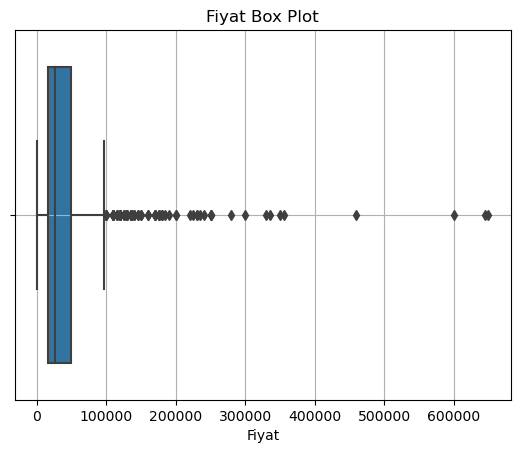

In [457]:
import seaborn as sns
import matplotlib.pyplot as plt

x=df['Fiyat']
y=df['Net(m²)']
sns.boxplot(x=df["Fiyat"])

plt.title('Fiyat Box Plot')
plt.xlabel('Fiyat')
plt.grid(True)

In [458]:
df=df[df['Fiyat']<600000] # for Outlier

In [459]:
df.isnull().sum()

Fiyat                0
İlan Tarihi          0
İlce                 0
Net(m²)              0
Brüt(m²)             0
Oda Sayısı           0
Banyo Sayısı         0
Kat Sayısı           0
İsıtma Tipi          0
Bina Türü          463
Bulunduğu Kat        0
Bina Yası            0
Esya Durumu          0
Kullanım Durumu    167
Yapının Durumu     441
Depozito             0
Aidat                0
Kimden             634
dtype: int64

In [477]:
df['Aidat'].unique()

array([    0,   400,   100,  2205,    20,  2200,    60,   850,   300,
        2000,   250,  1800,  1400,  4200,  4000,    50,   960,  3267,
        8250,   900,  3300,   500,  1900,   200,  2617,  1500,  3200,
        1300,   800,  1450,    35,  5000,     1,   750,  2750,  1600,
         700,  1000,   350,  5064,  2450,  2500,  2250,   600,  3500,
         150,  1200,    43,   120,  3800,  1250,   470,  6452,    17,
        2735,   550,    25,  7000,    80,   910,   630,   240,    90,
          75,   890,  6250,  8000,   450,  4500,  6500,  1815,  2400,
        3000,  2140,  1850,   180,  2800,  6450,  2084,   440, 15000,
         444,  2691,   480,   650,    70,   733,  4040,    30,  1870,
        5500,  1750, 10000,  2651])

In [460]:
x=df[['İlce', 'Net(m²)', 'Brüt(m²)', 'Oda Sayısı',
       'Banyo Sayısı', 'Kat Sayısı', 'İsıtma Tipi',
       'Bulunduğu Kat', 'Bina Yası', 'Esya Durumu',
        'Depozito', 'Aidat']]
y=df['Fiyat']

In [461]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1007
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   İlce           1005 non-null   object 
 1   Net(m²)        1005 non-null   int64  
 2   Brüt(m²)       1005 non-null   int64  
 3   Oda Sayısı     1005 non-null   int32  
 4   Banyo Sayısı   1005 non-null   int32  
 5   Kat Sayısı     1005 non-null   int32  
 6   İsıtma Tipi    1005 non-null   object 
 7   Bulunduğu Kat  1005 non-null   int32  
 8   Bina Yası      1005 non-null   int32  
 9   Esya Durumu    1005 non-null   float64
 10  Depozito       1005 non-null   int32  
 11  Aidat          1005 non-null   int32  
dtypes: float64(1), int32(7), int64(2), object(2)
memory usage: 74.6+ KB


In [462]:
x.isnull().sum()

İlce             0
Net(m²)          0
Brüt(m²)         0
Oda Sayısı       0
Banyo Sayısı     0
Kat Sayısı       0
İsıtma Tipi      0
Bulunduğu Kat    0
Bina Yası        0
Esya Durumu      0
Depozito         0
Aidat            0
dtype: int64

In [463]:
x=pd.get_dummies(x,drop_first=True)

## Modelling

In [478]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

def RegressionModels(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    GBR=GradientBoostingRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    algos = [L,E,R,Lass,GBR]
    algorithms = ['Linear','ElasticNet','Ridge','Lasso','Gradient Boosting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algorithms)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [479]:
RegressionModels(x,y)

,R_Squared,RMSE,MAE
Ridge,0.692942,24724.276348,16600.881322
Lasso,0.688697,24894.607306,16802.465927
Linear,0.688670,24895.687517,16817.912257
ElasticNet,0.592153,28494.580390,16882.407876
Gradient Boosting,0.547724,30006.489149,14963.647973


## Deep Learning, Tensorflow ve Keras ile yeniden modelleme

In [487]:
x=df[['Net(m²)', 'Brüt(m²)', 'Oda Sayısı',
       'Banyo Sayısı', 'Kat Sayısı',
       'Bulunduğu Kat', 'Bina Yası', 'Esya Durumu',
        'Depozito', 'Aidat']]
y=df['Fiyat']

In [488]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20,random_state=42)

In [489]:
model=Sequential()
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))  #regression
model.compile(loss='mse', optimizer='adam',) 

In [490]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=128, epochs=1500, verbose=0)

In [491]:
tahmin=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [492]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,tahmin)

0.6911578650602946

In [493]:
mean_squared_error(y_test,tahmin)**.5

24796.0157672303

In [494]:
loss_f=pd.DataFrame(history.history)

<Axes: >

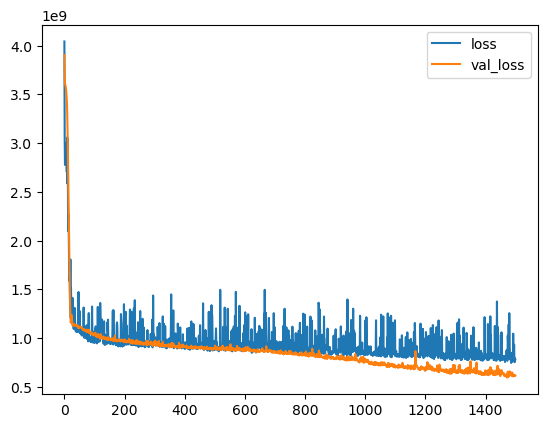

In [495]:
loss_f.plot()